In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('../data/processed/E_Commerce_Dataset_processed_w_fe.csv')
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,DissatisfactionIndex,DeviceToTenureRatio,InactivityRatio,RecencyWeight,SpendVelocity
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,1.5,0.6,1.0,0.166667,1.833333
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,1,0,0,0,1,1.0,0.4,0.0,1.000000,15.000000
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,1,0,0,0,1,1.0,0.4,0.3,0.250000,3.500000
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,0,0,1,0.0,4.0,3.0,0.250000,5.750000
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,1,0,0,0,1,0.0,3.0,3.0,0.250000,2.750000


While splitting the data we specify the stratify paramereter to Y to maintain distributed values as mentioned in the first notebook EDA.

In [ ]:
X = df.drop(['Churn','CustomerID'], axis=1)
Y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=11, train_size=0.8, test_size=0.2, stratify=Y)

ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

X_train.columns = X_train.columns.str.replace('&', 'and')
X_test.columns = X_test.columns.str.replace('&', 'and')

X_train.columns = X_train.columns.str.replace('-', '_')
X_test.columns = X_test.columns.str.replace('-', '_')

print(X_train.columns.tolist())

['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Mobile_Phone', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash_on_Delivery', 'PreferredPaymentMode_Credit_Card', 'PreferredPaymentMode_Debit_Card', 'PreferredPaymentMode_E_wallet', 'PreferredPaymentMode_UPI', 'Gender_Male', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop_and_Accessory', 'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile_Phone', 'PreferedOrderCat_Others', 'MaritalStatus_Married', 'MaritalStatus_Single', 'DissatisfactionIndex', 'DeviceToTenureRatio', 'InactivityRatio', 'RecencyWeight', 'SpendVelocity']


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=11),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=11),
    "XGBoost": xgb.XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss', random_state=11)
}

params = {
    "Logistic Regression": {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l2']
    },
    "Random Forest": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
    },
    "XGBoost": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 6, 10],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
    }
}
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=11)),
    ('classifier', LogisticRegression()),
])

<bound method IndexOpsMixin.tolist of Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'DissatisfactionIndex',
       'DeviceToTenureRatio', 'InactivityRatio', 'RecencyWeight',
       'SpendVelocity'],
      dtype='obje

In [5]:
results = []
best_estimators = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    pipeline.set_params(classifier=model)
    grid = GridSearchCV(pipeline, params[model_name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_estimators[model_name] = grid.best_estimator_
    
    y_pred = grid.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best Parameters': grid.best_params_,
        'F1 Score': report['1']['f1-score'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'Confusion Matrix': cm
    })
    
    print(f"Completed {model_name}.\n")

Training Logistic Regression...
Completed Logistic Regression.

Training Random Forest...
Completed Random Forest.

Training XGBoost...
Completed XGBoost.



In [6]:
print("\nResults Summary:")
results_df = pd.DataFrame(results)
print(results_df)


Results Summary:
                 Model                                    Best Parameters  \
0  Logistic Regression  {'classifier__C': 10, 'classifier__penalty': '...   
1        Random Forest  {'classifier__max_depth': None, 'classifier__m...   
2              XGBoost  {'classifier__learning_rate': 0.2, 'classifier...   

   F1 Score  Precision    Recall         Confusion Matrix  
0  0.618956   0.489297  0.842105  [[769, 167], [30, 160]]  
1  0.908136   0.905759  0.910526   [[918, 18], [17, 173]]  
2  0.917526   0.898990  0.936842   [[916, 20], [12, 178]]  


/var/folders/5f/z2qpt2hn4tj58715kwyjyrt80000gn/T/ipykernel_31059/2021863712.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


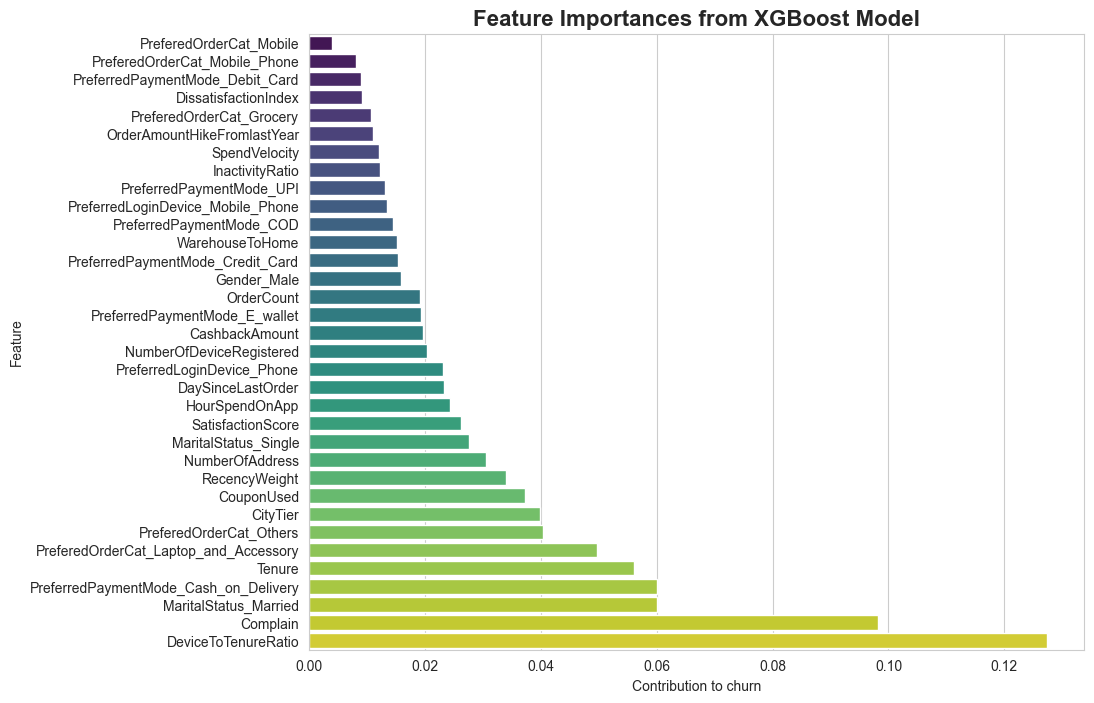

In [11]:
best_pipeline_for_xgb = best_estimators['XGBoost']
xgb_model = best_pipeline_for_xgb.named_steps['classifier']

feature_names = X_train.columns
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.xlabel('Contribution to churn')
plt.title('Feature Importances from XGBoost Model', fontsize=16, weight='bold')
plt.savefig('../visuals/XGBoost_Feature_Importances.png', bbox_inches='tight')
plt.show()
plt.close()


In [8]:
import joblib
joblib.dump(best_estimators['XGBoost'], '../models/best_model_xgboost.pkl')

['../models/best_model_xgboost.pkl']